<a href="https://colab.research.google.com/github/NivratiKothari/Medium-Netflix-Article-Code/blob/main/Nivrati_Netflix_Medium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-75ee494d75d6>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




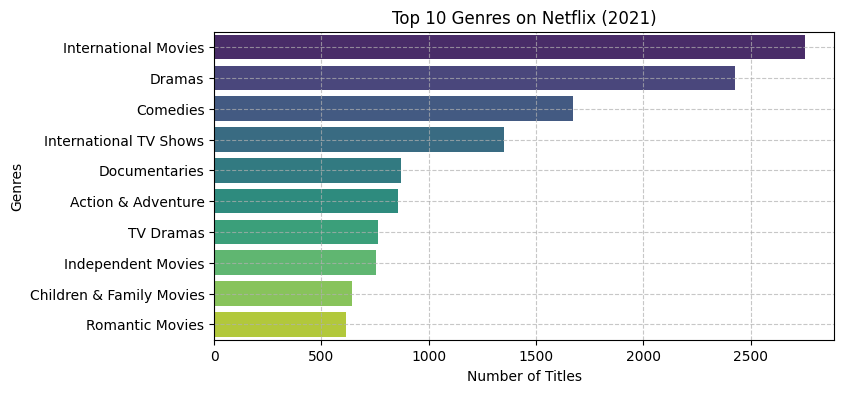

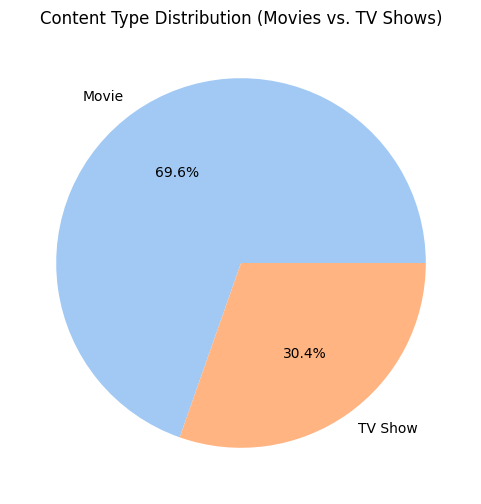

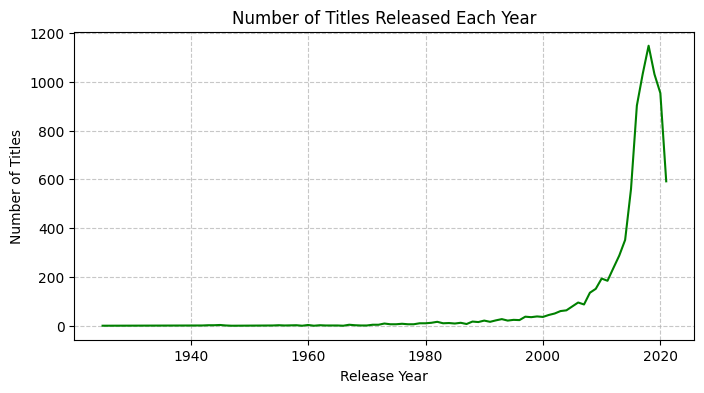

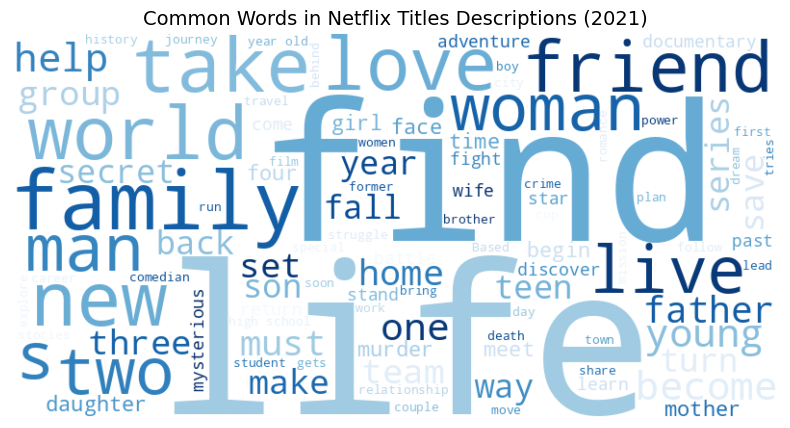

In [ ]:
# Google Colab Code for Netflix Titles 2021 EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the Netflix Titles 2021 dataset
file_path = '/content/netflix_titles_2021.csv'
netflix_df = pd.read_csv(file_path)

# Fill missing values for genres
netflix_df['listed_in'] = netflix_df['listed_in'].fillna('Unknown')

# 1. Bar Chart: Top 10 Genres on Netflix (2021)
genre_counts = netflix_df['listed_in'].str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Genres on Netflix (2021)')
plt.xlabel('Number of Titles')
plt.ylabel('Genres')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 2. Pie Chart: Content Type Distribution (Movies vs. TV Shows)
content_type_counts = netflix_df['type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(content_type_counts, labels=content_type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Content Type Distribution (Movies vs. TV Shows)')
plt.show()

# 3. Line Chart: Distribution of Release Years
release_year_counts = netflix_df['release_year'].value_counts().sort_index()
plt.figure(figsize=(8,4))
sns.lineplot(x=release_year_counts.index, y=release_year_counts.values, color='green')
plt.title('Number of Titles Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 4. Word Cloud: Common Words in Descriptions
descriptions = " ".join(netflix_df['description'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues', max_words=100).generate(descriptions)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Netflix Titles Descriptions (2021)', fontsize=14)
plt.show()


<ipython-input-12-f84f43a815c6>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




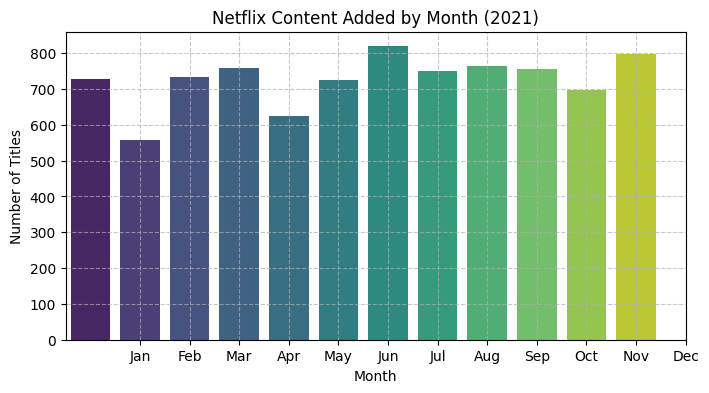

In [ ]:
# Google Colab Code: Analyze Which Month Netflix Adds the Most Content

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Netflix Titles 2021 dataset
file_path = '/content/netflix_titles_2021.csv'
netflix_df = pd.read_csv(file_path)

# Convert 'date_added' to datetime format
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

# Extract month from 'date_added'
netflix_df['month_added'] = netflix_df['date_added'].dt.month

# Count titles added by month
monthly_counts = netflix_df['month_added'].value_counts().sort_index()

# Plot titles added by month
plt.figure(figsize=(8,4))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')
plt.title('Netflix Content Added by Month (2021)')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()


<ipython-input-13-4b894cbc1d95>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




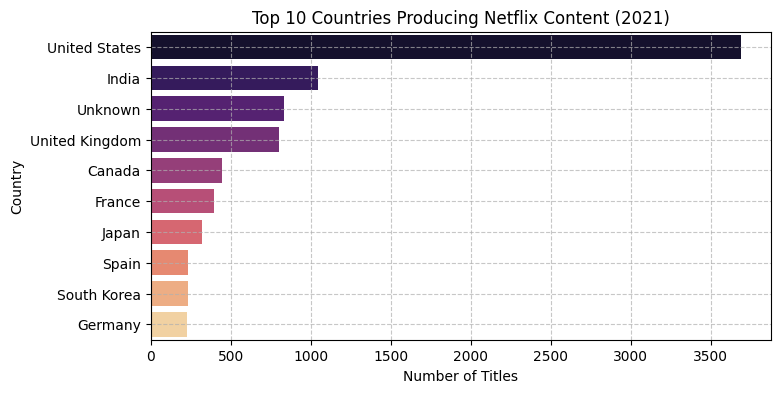

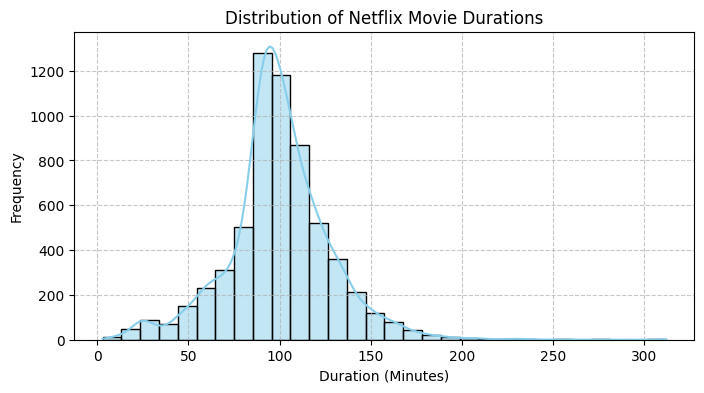

In [ ]:
# Google Colab Code: Analyze Countries with Most Content and Movie Duration Distribution

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Netflix Titles 2021 dataset
file_path = '/content/netflix_titles_2021.csv'
netflix_df = pd.read_csv(file_path)

# Fill missing values for 'country' and 'duration'
netflix_df['country'] = netflix_df['country'].fillna('Unknown')
netflix_df['duration'] = netflix_df['duration'].str.replace(' min', '', regex=True)
netflix_df['duration'] = pd.to_numeric(netflix_df['duration'], errors='coerce')

# 1. Bar Chart: Top 10 Countries Producing Content
country_counts = netflix_df['country'].str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='magma')
plt.title('Top 10 Countries Producing Netflix Content (2021)')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 2. Histogram: Distribution of Movie Durations
movie_durations = netflix_df[netflix_df['type'] == 'Movie']['duration'].dropna()
plt.figure(figsize=(8,4))
sns.histplot(movie_durations, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Netflix Movie Durations')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


<ipython-input-14-d1179b802d17>:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




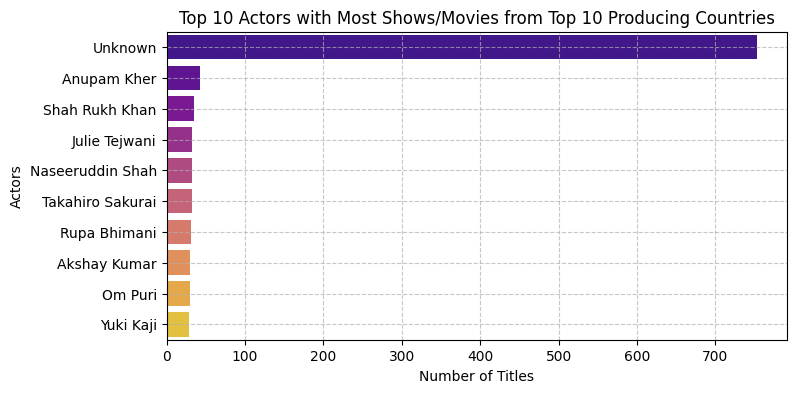

In [ ]:
# Google Colab Code: Top 10 Actors with Most Shows/Movies from Top 10 Producing Countries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Netflix Titles 2021 dataset
file_path = '/content/netflix_titles_2021.csv'
netflix_df = pd.read_csv(file_path)

# Fill missing values
netflix_df['country'] = netflix_df['country'].fillna('Unknown')
netflix_df['cast'] = netflix_df['cast'].fillna('Unknown')

# Get top 10 producing countries
top_countries = netflix_df['country'].str.split(', ').explode().value_counts().head(10).index

# Filter data for top countries
top_country_data = netflix_df[netflix_df['country'].str.contains('|'.join(top_countries))]

# Find top 10 actors by appearances
top_actors = top_country_data['cast'].str.split(', ').explode().value_counts().head(10)

# Plot top 10 actors
plt.figure(figsize=(8,4))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='plasma')
plt.title('Top 10 Actors with Most Shows/Movies from Top 10 Producing Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Actors')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


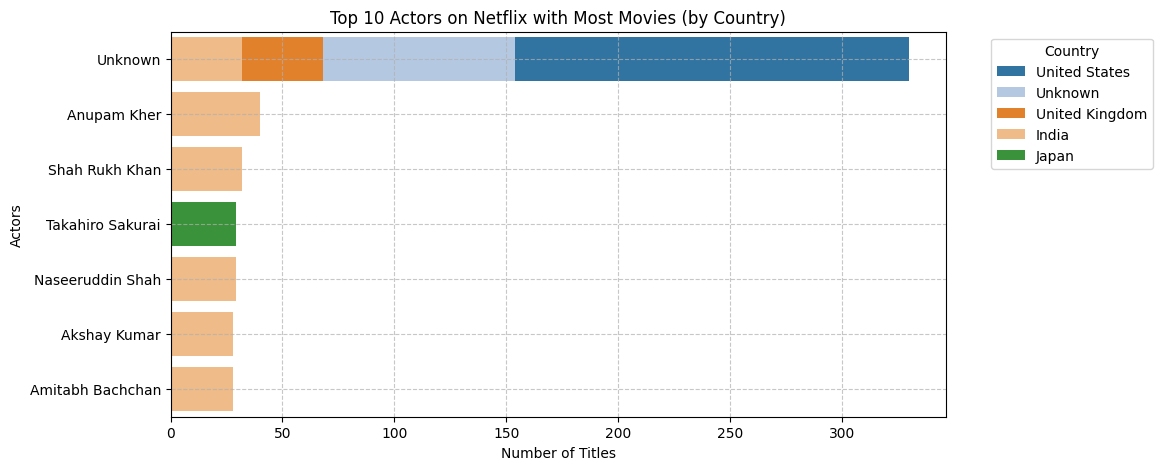

In [ ]:
# Google Colab Code: Top Actors on Netflix with Most Movies by Country

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Netflix Titles 2021 dataset
file_path = '/content/netflix_titles_2021.csv'
netflix_df = pd.read_csv(file_path)

# Fill missing values
netflix_df['country'] = netflix_df['country'].fillna('Unknown')
netflix_df['cast'] = netflix_df['cast'].fillna('Unknown')

# Get top 10 producing countries
top_countries = netflix_df['country'].str.split(', ').explode().value_counts().head(10)

# Filter data for top countries
top_country_data = netflix_df[netflix_df['country'].str.contains('|'.join(top_countries.index))]

# Find top 10 actors by appearances with their countries
actor_country = top_country_data[['cast', 'country']].dropna()
actor_country = actor_country.assign(cast=actor_country['cast'].str.split(', ')).explode('cast')
actor_counts = actor_country.groupby(['cast', 'country']).size().reset_index(name='title_count')
top_actors = actor_counts.sort_values(by='title_count', ascending=False).head(10)

# Plot top 10 actors with their countries
plt.figure(figsize=(10,5))
sns.barplot(x='title_count', y='cast', hue='country', data=top_actors, dodge=False, palette='tab20')
plt.title('Top 10 Actors on Netflix with Most Movies (by Country)')
plt.xlabel('Number of Titles')
plt.ylabel('Actors')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Optimized Google Colab Code: Top Actors by Country (Movies) on Netflix

import pandas as pd
from collections import Counter
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load Netflix Titles 2021 dataset
file_path = '/content/netflix_titles_2021.csv'
df = pd.read_csv(file_path)

# Function to trace top actors by country
def country_trace(country, flag="movie"):
    df["from_country"] = df['country'].fillna("").apply(lambda x: 1 if country.lower() in x.lower() else 0)
    country_df = df[df["from_country"] == 1]

    # Filter by movie or TV shows
    if flag == "movie":
        country_df = country_df[country_df["duration"].notna()]
    else:
        country_df = country_df[country_df["season_count"].notna()]

    # Find top actors
    cast = ", ".join(country_df['cast'].fillna("")).split(", ")
    tags = Counter(cast).most_common(20)
    tags = [tag for tag in tags if tag[0] != ""]

    labels, values = [tag[0] for tag in tags], [tag[1] for tag in tags]

    return go.Bar(y=labels[::-1], x=values[::-1], orientation="h", marker=dict(color="#a678de"))

# Create subplot for selected countries
countries = ["United States", "India", "United Kingdom", "Spain", "Japan", "South Korea", "France"]
fig = make_subplots(rows=2, cols=4, subplot_titles=countries)

# Add traces to subplots
for idx, country in enumerate(countries):
    trace = country_trace(country)
    row = (idx // 4) + 1
    col = (idx % 4) + 1
    fig.add_trace(trace, row=row, col=col)

# Layout configuration
fig.update_layout(height=800, width=1200, title_text="Top Actors in Netflix Movies by Country")
fig.show()


In [ ]:
# Optimized Google Colab Code: Top Actors in Netflix TV Shows (Selected Countries)

import pandas as pd
from collections import Counter
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load Netflix Titles 2021 dataset
file_path = '/content/netflix_titles_2021.csv'
df = pd.read_csv(file_path)

# Function to trace top actors for TV Shows by country
def country_trace(country):
    df['from_country'] = df['country'].fillna('').apply(lambda x: 1 if country.lower() in x.lower() else 0)
    # Filter by TV Show using the 'type' column instead of 'season_count'
    country_df = df[(df['from_country'] == 1) & (df['type'] == 'TV Show')]

    # Find top actors in TV shows
    cast = ", ".join(country_df['cast'].fillna('')).split(', ')
    tags = Counter(cast).most_common(15)
    tags = [tag for tag in tags if tag[0] != '']

    labels, values = [tag[0] for tag in tags], [tag[1] for tag in tags]

    return go.Bar(y=labels[::-1], x=values[::-1], orientation="h", marker=dict(color="#FF7F50"))

# Create subplot for selected countries
countries = ["United States", "Spain", "India", "United Kingdom", "Japan", "South Korea", "France"]
fig = make_subplots(rows=2, cols=4, subplot_titles=countries)

# Add traces to subplots
for idx, country in enumerate(countries):
    trace = country_trace(country)
    row = (idx // 4) + 1
    col = (idx % 4) + 1
    fig.add_trace(trace, row=row, col=col)

# Layout configuration
fig.update_layout(height=700, width=1200, title_text="Top Actors in Netflix TV Shows (US, Spain, India, UK, Japan, South Korea, France)")
fig.show()

In [ ]:
# Optimized Google Colab Code: Top Movie Directors from India on Netflix

import pandas as pd
from collections import Counter
import plotly.graph_objects as go

# Load Netflix Titles 2021 dataset
file_path = '/content/netflix_titles_2021.csv'
df = pd.read_csv(file_path)

# Filter for movies from India
india_movies = df[(df["type"] == "Movie") & (df["country"] == "India")]

# Count top directors from India
directors = ", ".join(india_movies['director'].fillna('')).split(', ')
counter_list = [item for item in Counter(directors).most_common(12) if item[0] != '']
labels = [item[0] for item in counter_list][::-1]
values = [item[1] for item in counter_list][::-1]

# Create bar chart using Plotly
trace = go.Bar(y=labels, x=values, orientation="h", name="Movies", marker=dict(color="orange"))
layout = go.Layout(title="Top Movie Directors from India on Netflix", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data=[trace], layout=layout)
fig.show()
